<a href="https://colab.research.google.com/github/visiont3lab/machine-learning-course/blob/main/classification/Project_Covid_Mask_Classifier_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Project Part1: Mask-NoMask Classifier

## Setup

In [1]:
# Scaricare il repositorio da github per avere accesso alle immagini
!git clone https://github.com/visiont3lab/covid-mask-classifier.git

Cloning into 'covid-mask-classifier'...
remote: Enumerating objects: 1084, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 1084 (delta 26), reused 15 (delta 3), pack-reused 1013
Receiving objects: 100% (1084/1084), 89.00 MiB | 26.39 MiB/s, done.
Resolving deltas: 100% (27/27), done.


## Intro to Image Processing

18
255
(1205, 1070, 3)
43
55
67


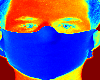

In [3]:
import cv2
from PIL import Image
import numpy as np

# Leggere un immagine (bianco e nero oppure a colori) e metterla dentro un numpy array
filepath = "/content/covid-mask-classifier/dataset/mask/2020-04_GQ_Face-Masks_3x2-7.jpg"
#im = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE) # 0-255 
#im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED) # 0-255 
im = cv2.imread(filepath, cv2.IMREAD_COLOR) # 0-255  unit8 -- unint16

print( np.min(im) )
print( np.max(im) )
print( im.shape)
print( im[0,0,0]) # Accediamo al pixel blu    --> B
print( im[0,0,1]) # Accediamo al pixel verde  --> G
print( im[0,0,2]) # Accediamo al pixel Ross   --> R

im =cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Conversione da RGB a Bianco e nero
im =cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

# Colora un immagine in bianco e nero con una colormap
im = cv2.applyColorMap(im, cv2.COLORMAP_JET);

# La colormap e BGR convertila a RGB per visualizzazione correta
im =cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Resize Immagine
im = cv2.resize(im, (100,80))

# numpy array --> Immagine PIL --> RGB
display(Image.fromarray(im))
#cv2.imshow()

## Read Data

In [5]:
import os
import cv2
from PIL import Image
import numpy as np


# ritorna i nomi dei file contenuti nella cartella --> li ritorna come listaù
directory_path_mask = "/content/covid-mask-classifier/dataset/mask"
directory_path_nomask = "/content/covid-mask-classifier/dataset/no-mask"

# Dati finali
X = []
Y = []

def preprocess(filepath):

  # Read Image
  # im = cv2.imread(filepath, cv2.IMREAD_UNCHANGED) # 0-255  unit8 -- unint16
  im = cv2.imread(filepath, cv2.IMREAD_COLOR) # 0-255  unit8 -- unint16
  
  # Conver to RGB
  im =cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

  # Conversione da RGB a Bianco e nero
  #im =cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

  # Colora un immagine in bianco e nero con una colormap
  #im = cv2.applyColorMap(im, cv2.COLORMAP_JET);

  # La colormap e BGR convertila a RGB per visualizzazione correta
  #im =cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

  # Resize Immagine
  im = cv2.resize(im, (128,128))
  #print(im.shape)

  return im

# Importante che le cartelle mask e no mask contengano lo stesso numero di immagini 
for name_mask, name_nomask in zip(os.listdir(directory_path_mask)[0:200] , os.listdir(directory_path_nomask)[0:200]):

  # Get filepath (path completo) dell' immagine
  filepath_mask = os.path.join(directory_path_mask,name_mask)
  filepath_nomask = os.path.join(directory_path_nomask,name_nomask)
  #filepath = directory_path + "/" + name

  im_mask = preprocess(filepath_mask)
  im_nomask = preprocess(filepath_nomask)

  xdata_mask = im_mask.reshape(-1)
  xdata_nomask = im_nomask.reshape(-1)
  
  X.append(xdata_mask)
  X.append(xdata_nomask)
  Y.append(0)
  Y.append(1)
  
  # numpy array --> Immagine PIL --> RGB
  #display(Image.fromarray(im_mask))
  #display(Image.fromarray(im_nomask))
  
  #break

X = np.array(X, dtype=np.float32)
Y = np.array(Y, dtype=np.float32)


## Training

In [6]:
from sklearn.model_selection import train_test_split
# Train e test data
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.20,shuffle=True, random_state=25)

In [8]:
from sklearn.preprocessing import  MinMaxScaler  
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score, accuracy_score, f1_score
from sklearn.externals import joblib
from sklearn.decomposition import PCA

pipe = Pipeline([
    ("normalize", MinMaxScaler(feature_range=(0,1))), 
    ("pca", PCA(0.99)), 
    ("model", SVC()),
])
pipe.fit(X_train,y_train)

y_train_hat = pipe.predict(X_train)
y_test_hat = pipe.predict(X_test)

# Save 
joblib.dump(pipe, "model.pkl")

['model.pkl']

In [9]:
precision = precision_score(y_test,y_test_hat)
recall = recall_score(y_test,y_test_hat)
accuracy = accuracy_score(y_test,y_test_hat)
f1 = f1_score(y_test,y_test_hat,average="weighted")
print("precision:", precision)
print("recall:", recall)
print("accuracy:", accuracy)
print("f1:", f1)


precision: 0.9
recall: 1.0
accuracy: 0.95
f1: 0.9501253132832079


In [10]:
from sklearn.metrics import confusion_matrix
import pandas as pd
# 0  mask  1 senza
cm_train = confusion_matrix(y_train,y_train_hat)
cm_test = confusion_matrix(y_test,y_test_hat)
df_train = pd.DataFrame(cm_train, columns=["Pred-Mask","Pred-No-Mask"], index=["Real-Mask","Real-No-Mask"])
df_test = pd.DataFrame(cm_test, columns=["Pred-Mask","Pred-No-Mask"], index=["Real-Mask","Real-No-Mask"])
print("TRAIN")
display(df_train)
print("TEST")
display(df_test)

TRAIN


,Pred-Mask,Pred-No-Mask
Real-Mask,155,1
Real-No-Mask,0,164


TEST


,Pred-Mask,Pred-No-Mask
Real-Mask,40,4
Real-No-Mask,0,36


| Risultato Esatto   | Risulato Predetto |  |
|------------|---------------------------|--|
|            |   Negativo | Positivo |
|Negativo    |    TN=97750     |    FP=150    |
|Positivo    |    FN=330      |    TP=1770    |



* Accuracy = $\frac{TP+TN}{TP+TN+FP+FN}$

* Recall = $\frac{TP}{TP+FN}$

* Precision = $\frac{TP}{TP+FP}$

* F1 = $\frac{2*Precision*recall}{Precision+Recall}$

## Extra PCA Examples

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=0.99)
X_t = pca.fit_transform(X)  # 1000x 512*512*3
print(X.shape)
print(X_t.shape)